# Objectives
* Describe when classification is the appropriate analysis technique
* Use scikit-learn to perform classification


## Iris Species Classification
The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is one of the most popular datasets for machine learning. 

As you know, there are 4 features: sepal length, sepal width, petal length, and petal width. The only difference between this dataset and the one we used in the Clustering Exercise is that now we have the target (alternatively known as class or label). The dataset contains one target: species. We will explore a couple different classification techniques to use our 4 features to predict the target.

![iris](images/iris.png)

***

# Classification
Classification is a supervised analytical technique used on labeled categorical data to accurately predict the class of unknown data points. 

# 1. K-Nearest Neighbors (KNN) Pseudocode
1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Example training data

![Training data](images/knn_dataset.png)

### KNN classification map (K=1)
**Note:** This is NOT k-means clustering and we are NOT splitting our data into K groups. We are looking at the K nearest neighbors (data points) and classifying the new data point as that neighbor's class. For example if we found a new iris that was plotted in the top left corner, based on out K=1 model, we would classify this new point as red.

![1NN classification map](images/1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/5nn_map.png)

### Loading the Data

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

### Inspecting the Data
Now that we have loaded the data, let's get familiar with the dataset and what it looks like. First, examine the type of object for our variable `iris`.

In [3]:
# what type of object is iris?
type(iris)

sklearn.utils.Bunch

This is a different object type that we haven't seen before! Let's look into it by typing `iris`.

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

It looks like this `sklearn.utils.Bunch` is simply a dictionary containing the keys `data`, `target`, `frame`, `target_names`, `DESCR` (description), `feature_names` and `filename`.

In [5]:
# what does the data look like? an array!
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
# what do the targets look like? another array!
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [8]:
# shape of X
X.shape

(150, 4)

In [9]:
# shape of y
y.shape

(150,)

In [10]:
# target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Four Part scikit-learn Modeling Process
Now that we understand our dataset, let's start to explore a four part process to Choose and Train a Model (Steps 3 and 4 in the 7 Machine Learning Steps) 
**Part 1:** Import the class (model) you plan to use

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Part 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [14]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Part 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [15]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

**Part 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [16]:
# let's assume we see a flower with the measurements 3, 5, 4, and 2
knn.predict([[3, 5, 4, 2]])

array([2])

- Returns a NumPy array containing predicted labels
- Can predict for multiple observations at once

In [17]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

### Using a Different Value for K

In [18]:
# Part 2 - instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Part 3 - fit the model with the original data
knn.fit(X, y)

# Part 4 - predict the response for new observations
knn.predict(X_new)

array([1, 1])

# 2. Logisitic Regression
Logistic Regression isn't far from Linear Regression, they are both under the supervised learning umbrella! We are using some features (X) to predict some target (y). The distinct difference is that Classification targets are categorical/discrete where Regression targets are continuous/numerical. 

Binary Classification (target can only be one of two values, show below) is the simplist form of logistic regression. We are taking it one small step further and we are conducting Multi-Class Classification because we have three different iris species.  
![Logistic Regression](images/logreg.PNG)

Let's use our four part modeling process again!

In [20]:
# Part 1 - import the class
from sklearn.linear_model import LogisticRegression

# Part 2 - instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# Part 3 - fit the model with data
logreg.fit(X, y)

# Part 4 - predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

### Classification Accuracy
Classification accuracy is a common evaluation metric for classification problems. It represents the proportion of correct predictions.

In [22]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


Our model above used 100% of the data points to train the model, so it essentially has "seen all of the answers". This accuracy is known as **training accuracy** (the accuracy of predicting training data). Examine the classification accuracy for our KNN (K=1) and KNN (K=5) models.

### KNN (K=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
m
print(metrics.accuracy_score(y, y_pred))

1.0


### KNN (K=5)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on predicting data that **it has never seen before**.
- Maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data (green line)

![Overfitting](images/overfitting.png)

# 3. Splitting our Data
1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

![Train Test Split](images/train_test_split.PNG)

In [25]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [26]:
# inspect the shapes of the new X objects
X_train.shape
# X_test.shape

(90, 4)

In [27]:
# inspect the shapes of the new y objects
y_train.shape
# y_test.shape

(90,)

### Logistic Regression

In [28]:
# train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### KNN (K=5)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### KNN (K=1)

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Can we find an even better value for K?

In [32]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [33]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

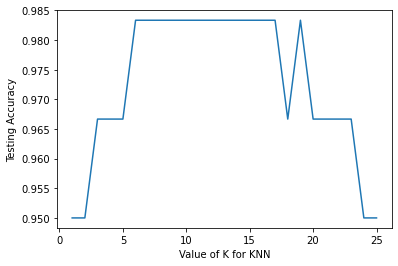

In [34]:
# plot the relationship between K and testing accuracy
sns.lineplot(x=k_range, y=scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex (over-fit) or not complex (under-fit) enough
- For KNN models, complexity is determined by the **value of K**
    - Large value of K = simple model = underfit
    - Small vlaue of  K = complex model = overfit